# 导入相关库

In [4]:
# -*- coding: utf-8 -*-
#利用爬虫获取B站相关信息
import requests as req
from lxml import etree     
import re
import json
import pprint
import time
import random

# 设置需要搜索的网页——获取网页信息

In [5]:
#%%

#网址（具体想获取哪一页的信息就改变keyword的里面的关键词）
url = 'https://search.bilibili.com/all?keyword=教程&from_source=web_search&order=stow&duration=0&tids_1=0'
#网络请求参数
headers = {
        'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:96.0) Gecko/20100101 Firefox/96.0", #浏览器标识
        #网络请求标识
        'Cookie': "b_ut=5; i-wanna-go-back=-1; _uuid=E33DDA58-AAA2-3557-47C5-8C635F632FED32799infoc; buvid3=0D5BE81D-7A53-4176-BCFD-A5F627BBAF78167617infoc; sid=9li8k65v; fingerprint=60b24c01972efd46eadb33b239bbb1b7; buvid_fp=fd0a668603be14e6bd37d43ba7066b2f; buvid_fp_plain=0D5BE81D-7A53-4176-BCFD-A5F627BBAF78167617infoc; SESSDATA=6041f67b%2C1647093758%2Cf4726%2A91; bili_jct=e592b1e222f22f164a665dbe4ed8be3d; DedeUserID=19964918; DedeUserID__ckMd5=f1bd51f43a011691; CURRENT_FNVAL=4048; blackside_state=0; rpdid=|(u~||~|uRk|0J'uYJulRu~mk; CURRENT_BLACKGAP=0; bp_video_offset_19964918=620933824401405400; bp_t_offset_19964918=620933824401405438; CURRENT_QUALITY=80; PVID=1; LIVE_BUVID=AUTO7116333603301274; video_page_version=v_old_home; fingerprint3=142bf7eed9e39d697f9f2cd1fbd20f57; fingerprint_s=6e3964ed34c67ea18dda5f1c7fc38ef9; buvid4=92E5DB0A-2B89-6675-C8B4-5EBED6921AAF63381-022012015-Pk1O31qDhl6eOEVD7gsGN35lz0j1wh/4hymQ7KTSi7Tb3+4ZPuhfXw%3D%3D; innersign=1; b_lsid=1C92E10BD_17EA368F31A; bsource=search_360; arrange=matrix",
        'Host':"search.bilibili.com",
        }
    
response = req.get(url,headers=headers)   ##返回了一个对象
contents=response.content.decode("utf8")
html = etree.HTML(contents)  #此处生成了一个HTML格式的文件，无法直接打印
result = etree.tostring(html,encoding="utf8").decode("utf-8")
print(result)

<html><head><title data-vue-meta="true">攻略 _ 搜索结果_哔哩哔哩_Bilibili</title> <meta data-vue-meta="true" charset="UTF-8"/><meta data-vue-meta="true" http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta data-vue-meta="true" name="renderer" content="webkit|ie-comp|ie-stand"/><meta data-vue-meta="true" name="description" content="点击查看更多相关视频、番剧、影视、直播、专栏、话题、用户等内容；你感兴趣的视频都在B站，bilibili是国内知名的视频弹幕网站，这里有及时的动漫新番，活跃的ACG氛围，有创意的Up主。大家可以在这里找到许多欢乐。"/><meta data-vue-meta="true" name="keywords" content="B站,弹幕,字幕,AMV,MAD,MTV,ANIME,动漫,动漫音乐,游戏,游戏解说,ACG,galgame,动画,番组,新番,初音,洛天依,vocaloid"/><meta name="spm_prefix" content="333.337"/><meta data-vue-meta="true" charset="UTF-8"/><meta name="referrer" content="no-referrer-when-downgrade"/><link rel="dns-prefetch" href="//s1.hdslb.com"/><link rel="dns-prefetch" href="//i0.hdslb.com"/><link rel="dns-prefetch" href="//i1.hdslb.com"/><link rel="dns-prefetch" href="//i2.hdslb.com"/><link rel="dns-prefetch" href="//static.hdslb.com"/><link rel="shortcut icon" href="

# 对应网址
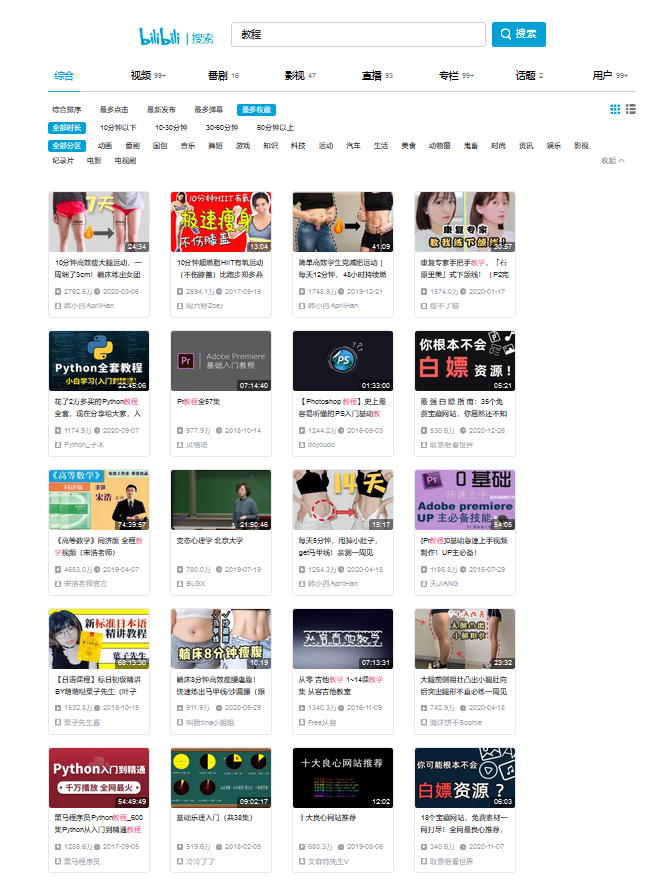

# 获取以上所有视频的BV号

In [6]:
xpath=html.xpath('//ul[@class="video-list clearfix"]/li[@class="video-item matrix"]/a/@href')#用于找到视频中的网址

BV_num = []
for xp in xpath:
    BV_num.append('BV'+re.findall(r'(?<=BV).+(?=\?from)',xp)[0]) #用于匹配每个视频的BV号


# 网址展示

In [10]:
for i in range(len(xpath)):
    print(xpath[i])

//www.bilibili.com/video/BV1bV411s7yq?from=search
//www.bilibili.com/video/BV1Z54y1q7hJ?from=search
//www.bilibili.com/video/BV1w4411n7hQ?from=search
//www.bilibili.com/video/BV1p4411x7Ys?from=search
//www.bilibili.com/video/BV1AL4y1z7rv?from=search
//www.bilibili.com/video/BV1Bx411U7EA?from=search
//www.bilibili.com/video/BV1fq4y1Q7Fa?from=search
//www.bilibili.com/video/BV1aJ411E7Ht?from=search
//www.bilibili.com/video/BV1ro4y1Z7mJ?from=search
//www.bilibili.com/video/BV1Dv411z7rX?from=search
//www.bilibili.com/video/BV1Uq4y1W7K5?from=search
//www.bilibili.com/video/BV1y4411x76H?from=search
//www.bilibili.com/video/BV1bU4y1n7g9?from=search
//www.bilibili.com/video/BV1JX4y1c7ss?from=search
//www.bilibili.com/video/BV12W411W7Af?from=search
//www.bilibili.com/video/BV1fU4y177uc?from=search
//www.bilibili.com/video/BV164411e7yB?from=search
//www.bilibili.com/video/BV1Yb41177qE?from=search
//www.bilibili.com/video/BV1HT4y1g7AX?from=search
//www.bilibili.com/video/BV1o34y197vF?from=search


# BV号展示

In [11]:
for i in range(len(BV_num)):
    print(BV_num[i])

BV1bV411s7yq
BV1Z54y1q7hJ
BV1w4411n7hQ
BV1p4411x7Ys
BV1AL4y1z7rv
BV1Bx411U7EA
BV1fq4y1Q7Fa
BV1aJ411E7Ht
BV1ro4y1Z7mJ
BV1Dv411z7rX
BV1Uq4y1W7K5
BV1y4411x76H
BV1bU4y1n7g9
BV1JX4y1c7ss
BV12W411W7Af
BV1fU4y177uc
BV164411e7yB
BV1Yb41177qE
BV1HT4y1g7AX
BV1o34y197vF


# 将BV号转换成AV号
+ （BV号是B站对于AV号的加密，实际返回的评论的网址用的还是AV号）

In [12]:
#%%
def Bta(bv):


	if bv[:2] == 'av':
		return bv[2:]
	bv = list(bv[2:])
	keys = {'1': 13, '2': 12, '3': 46, '4': 31, '5': 43, '6': 18, '7': 40, '8': 28, '9': 5,
			'A': 54, 'B': 20, 'C': 15, 'D': 8, 'E': 39, 'F': 57, 'G': 45, 'H': 36, 'J': 38, 'K': 51, 'L': 42, 'M': 49, 'N': 52, 'P': 53, 'Q': 7, 'R': 4, 'S': 9, 'T': 50, 'U': 10, 'V': 44, 'W': 34, 'X': 6, 'Y': 25, 'Z': 1,
			'a': 26, 'b': 29, 'c': 56, 'd': 3, 'e': 24, 'f': 0, 'g': 47, 'h': 27, 'i': 22, 'j': 41, 'k': 16, 'm': 11, 'n': 37, 'o': 2, 'p': 35, 'q': 21, 'r': 17, 's': 33, 't': 30, 'u': 48, 'v': 23, 'w': 55, 'x': 32, 'y': 14, 'z': 19}
	for i in range(len(bv)):
		bv[i] = keys[bv[i]]
	bv[0] *= (58 ** 6)
	bv[1] *= (58 ** 2)
	bv[2] *= (58 ** 4)
	bv[3] *= (58 ** 8)
	bv[4] *= (58 ** 5)
	bv[5] *= (58 ** 9)
	bv[6] *= (58 ** 3)
	bv[7] *= (58 ** 7)
	bv[8] *= 58
	return str((sum(bv) - 100618342136696320) ^ 177451812)

AV_num = []
for i in range(len(BV_num)):
    AV_num.append(Bta(BV_num[i]))

# AV号展示

In [13]:
for i in range(len(AV_num)):
    print(AV_num[i])

418684089
841425476
54269405
51121699
848762117
10066920
589319752
83847394
373403252
243370220
546788069
51188900
674294275
716839479
20521880
674855388
51690236
47062265
925840878
806924667


# 提取每一个视频中的所有评论

In [ ]:
#提取第一页
all_content = []
for j in range(0,len(AV_num)):
    #构建每一个视频的评论的网址
    r = 'https://api.bilibili.com/x/v2/reply/main?&jsonp=jsonp&next=0&type=1&oid={}&mode=3&plat=1'.format(AV_num[j])
    response = req.get(r)   ##返回了一个对象
    data = json.loads(response.text)#得到评论
    
    for i in data['data']['replies']:
        pprint.pprint([i['content']['message']])
        all_content.append([i['content']['message']])
        
        
    #获取总评论数
    all_number = data['data']['cursor']['all_count']
    try:     
        for i in range(2,int(all_number/20)):
            print(i)
            #使用循环实现翻页
            r1 = 'https://api.bilibili.com/x/v2/reply/main?&jsonp=jsonp&next={}&type=1&oid={}&mode=3&plat=1'.format(i,AV_num[j])
            response1 = req.get(r1)   ##返回了一个对象
            data1 = json.loads(response1.text)
            
            if (i%100 == 0):time.sleep(random.random())
            
            for i in data1['data']['replies']:
                all_content.append([i['content']['message']])
                
    except TypeError: 
        continue
    

# 保存内容

In [ ]:
#保存信息

excel = open(r"C:\Users\86182\Desktop\content1.xlsx",'w', encoding='utf-8') #设置保存路径，我这里设置的是我自己的电脑的桌面
for i in range(len(all_content)):
    excel.write(str(all_content[i]))
    excel.write('\n')
excel.close()

# 内容展示
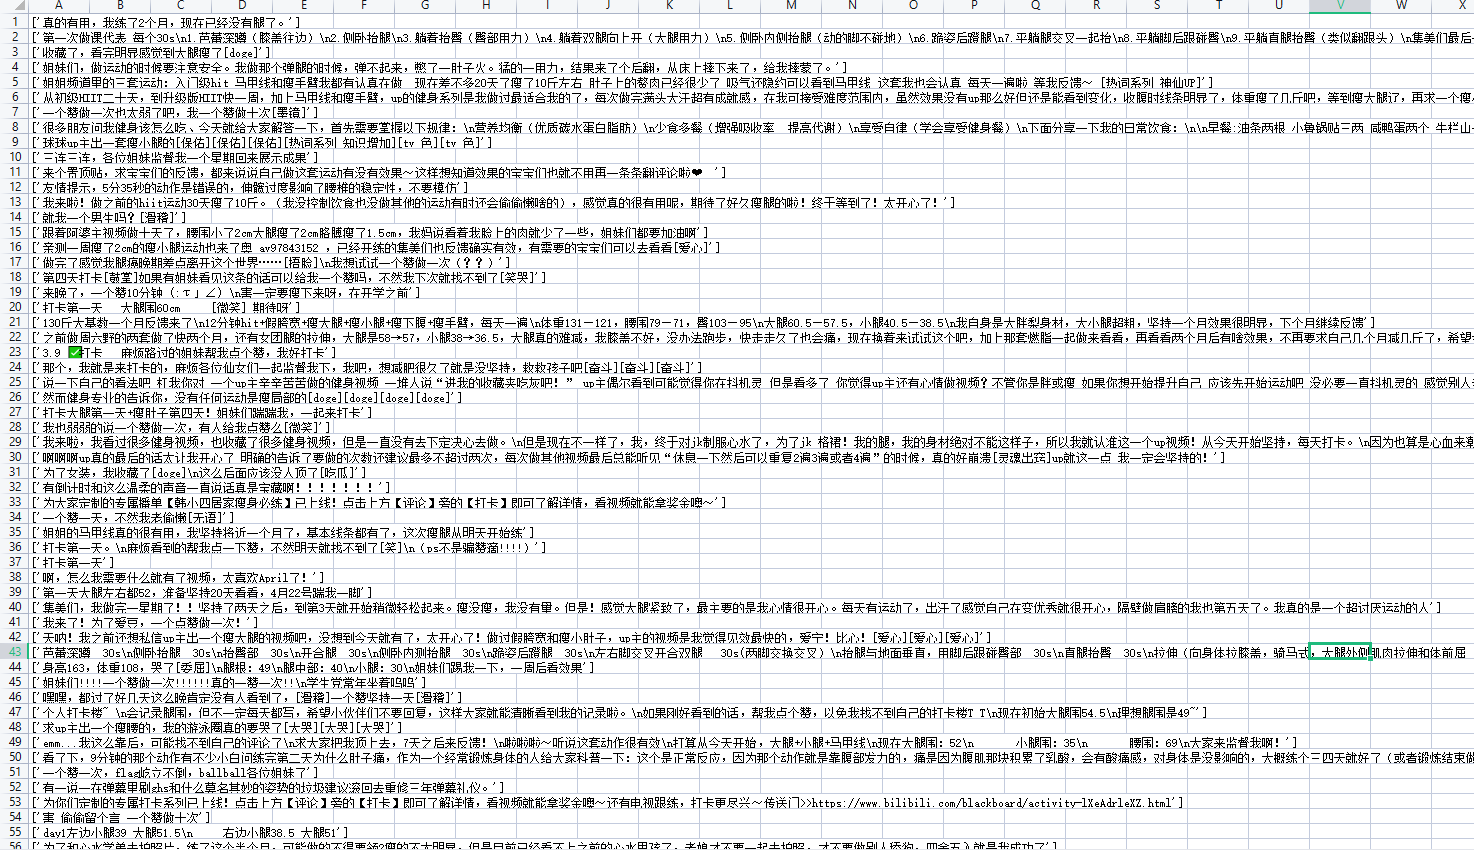